In [5]:
# Funkcja obliczająca wielomiany Laguerre'a dla zadanego n i alfa
def Laguerre_polynomials_general(n, x, alf = 0):
    if n == 0:
        return 1
    elif n == 1:
        return 1.0 - x + alf
    else:
        return ((2 * n - 1 + alf - x) * Laguerre_polynomials_general(n - 1, x, alf) - (n - 1 + alf) * Laguerre_polynomials_general(n - 2, x, alf)) / n

# Funkcja obliczająca iteracyjnie wielomiany Laguerre'a dla zadanego n i alfa
def Laguerre_polynomials_iterative_general(n, x, alf = 0):
    if n == 0:
        return 1
    elif n == 1:
        return 1.0 - x + alf
    else:
        P_0 = 1
        P_1 = 1.0 - x + alf
        P_i = 0

        for i in range(2, n + 1):
            P_i = ((2 * i - 1 + alf - x) * P_1 - (i - 1 + alf) * P_0) / i
            P_0, P_1 = P_1, P_i

        return P_i

# Funkcja obliczająca pochodną wielomianu Laguerre'a z uwzględnieniem alfa
def Laguerre_derivative_general(n, x, alf = 0):
    if n == 0:
        return 0
    elif n == 1:
        return -1
    else:
        # Pochodna wielomianu Laguerre'a, uwzględniając alfa
        return (n * Laguerre_polynomials_iterative_general(n, x, alf) - n * Laguerre_polynomials_iterative_general(n - 1, x, alf)) / x


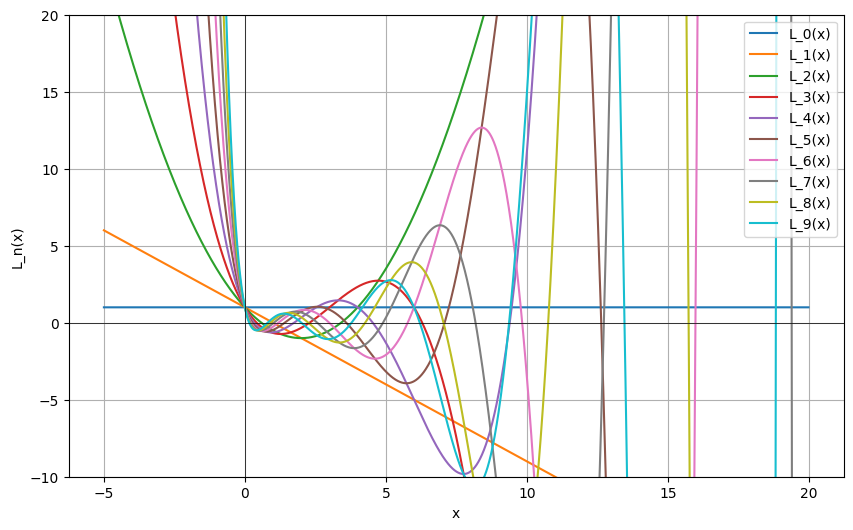

In [6]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math

# Using Numpy to create an array X
X = np.arange(-5, 20, 0.01)

plt.figure(figsize=(10, 6))

# Rysujemy pierwsze 10 wielomianów Legendre'a
for i in range(10):
    Y = [Laguerre_polynomials_iterative_general(i, x) for x in X]
    plt.plot(X, Y, label=f'L_{i}(x)')

plt.xlabel('x')
plt.ylabel('L_n(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.ylim(-10,20)
plt.grid(True)
plt.legend()

In [7]:
import numpy as np
from scipy.special import gamma
import math

def Gauss_Laguerre_roots(n,alf=0, tolerance=1e-14, max_iter=520):
    """
    Oblicza węzły kwadratury Gaussa-Laguerre'a dla alfa = 0, używając własnych funkcji.
    
    Parametry:
        n (int): liczba węzłów (stopień wielomianu Laguerre'a)
        tolerance (float): dokładność numeryczna dla metody Newtona
        max_iter (int): maksymalna liczba iteracji Newtona

    Zwraca:
        list: lista węzłów
    """
    roots = []
    
    if n == 1:
        return [1.0]  # Jedyny pierwiastek dla L1(x)
    elif n == 2:
        return [2.0 - np.sqrt(2), 2.0 + np.sqrt(2)]
    else:
        for i in range(n):
        # Początkowe przybliżenia dla pierwiastków
        #numerical recipes
            if i == 0:
                x = (1.0 + alf) * (3.0 + 0.92 * alf) / (1.0 + 2.4 * n + 1.8 * alf)
            elif i == 1:
                x += (15.0 + 6.25 * alf) / (1.0 + 0.9 * alf + 2.5 * n)
            else:
                x += ((1.0 + 2.55 * (i-1)) / (1.9 * (i-1)) + 1.26 * (i-1) * alf / (1.0 + 3.5 * (i-1))) * (x - roots[i - 2]) / (1.0 + 0.3 * alf)

            for _ in range(max_iter):
                Ln = Laguerre_polynomials_iterative_general(n, x, alf)
                Ln_prime = Laguerre_derivative_general(n, x, alf)
                
                
                dx = -Ln / Ln_prime
                x += dx
                
                if abs(dx) < tolerance:
                    break
            
            roots.append(x)
            
    
    return roots

#wzor z wikipedii
def Gauss_Laguerre_weights(xi, n, alf=0):
    """
    Oblicza wagę dla węzła Gaussa-Laguerre'a na podstawie wzoru z Wikipedii.
    
    Parametry:
        xi (float): węzeł Gaussa-Laguerre'a (pierwiastek)
        n (int): liczba węzłów
        alf (float): parametr alfa

    Zwraca:
        float: waga dla węzła xi
    """
    # Oblicz wartość Gamma(n + alfa + 1)
    gamma_term = gamma(n + alf + 1)
    # Oblicz wartość L_{n+1}^{(alf)}(xi)
    L_n_plus_1 = Laguerre_polynomials_iterative_general(n + 1, xi, alf)
    
    # Oblicz silnię n!
    factorial_n = math.factorial(n)
    
    # Oblicz wagę
    weight = (gamma_term * xi) / (factorial_n * (n + 1)**2 * L_n_plus_1**2)
    
    return weight

In [8]:
from scipy.integrate import quad

def Gauss_Laguerre_integral(n, f, alf=0):
    # Oblicz węzły (roots) i wagi (weights) Gaussa-Laguerre'a
    roots = Gauss_Laguerre_roots(n, alf)
    weights = [Gauss_Laguerre_weights(xi, n, alf) for xi in roots]
    
    # Oblicz wartość całki
    integral_value = 0.0
    for i in range(n):
        integral_value += weights[i] * f(roots[i])  # f(x_i) * w_i
    
    return integral_value

def f(x):
    return np.sin(np.pi*((1+np.sqrt(x))/(1+x**2)))

def integrand(x):
    return np.sin(np.pi*((1+np.sqrt(x))/(1+x**2)))*np.exp(-x)
result ,_ = quad(integrand, 0, np.inf)



def f2(x):
    return 1

def integrand2(x):
    return np.exp(-x)

result2 ,_ = quad(integrand2, 0, np.inf)


def f3(x):
    return x**4

def integrand3(x):
    return np.exp(-x)*x**4

result3 ,_ = quad(integrand3, 0, np.inf)

N_vals = [3,5,7,9,11,17,23,30,38]


def print_approximations(max_n, f, alf=0):
    print("n\tPrzybliżenie")
    for n in range(1,max_n+1):
        approx = Gauss_Laguerre_integral(n, f, alf)
        print(f"{n}\t{approx}")

print(f"Dokładna całka z scipy: {result}")
print_approximations(35, f, alf=0)

print(f"Dokładna całka z scipy: {result2}")
print_approximations(35, f2, alf=0)


print(f"Dokładna całka z scipy: {result3}")
print_approximations(35, f3, alf=0)

Dokładna całka z scipy: -0.21727508521083827
n	Przybliżenie
1	1.2246467991473532e-16
2	-0.6173428033317585
3	-0.4098444282244653
4	-0.2191643766737864
5	-0.15745567341675396
6	-0.17803793751826189
7	-0.2199645444073202
8	-0.2504653983389183
9	-0.2621616652988756
10	-0.2596747814771418
11	-0.25014639210657547
12	-0.23914461360056058
13	-0.22980134328067403
14	-0.2232762883189784
15	-0.2195201700989015
16	-0.21792117648899492
17	-0.21772982747374064
18	-0.21828524248740064
19	-0.2191025025762672
20	-0.2198786819243709
21	-0.22046031352220263
22	-0.22079925371302392
23	-0.22091141905932962
24	-0.22084448157823594
25	-0.22065569889620046
26	-0.22039861958026952
27	-0.220116515387426
28	-0.21984035538447344
29	-0.21958949125159535
30	-0.21937369582694424
31	-0.21919564591731938
32	-0.2190533053476384
33	-0.21894193123733321
34	-0.2188556047205578
35	-0.21878829483970877


In [10]:
import numpy as np

# Oscylująca funkcja z pierwiastkiem i wymiernym mianownikiem
def f1(x):
    return np.sin(np.pi * (1 + np.sqrt(x)) / (1 + x**2))

# Wersja z logarytmem (log(x + 1) dobrze się zachowuje w 0)
def f2(x):
    return np.log(x + 1) / (1 + x**2)

# Funkcja z pierwiastkiem i sinusoidą
def f3(x):
    return np.sin(x)

# Gładka funkcja z silnym tłumieniem
def f4(x):
    return np.exp(-x**2) * (x + 1)**0.5

# Funkcja z wielomianem i funkcją wykładniczą
def f5(x):
    return x**2 / (1 + np.exp(x))

# Oscylująca z silnym tłumieniem
def f6(x):
    return np.sin(3 * x) / (x + 1)**2

# Wersja bez oscylacji, ale z ciekawym profilem
def f7(x):
    return np.arctan(x) / (1 + x)

def f8(x):
    return 1/np.sqrt(1+x**2)

def f9(x):
    return np.sin(10*x)

def integrand1(x):
    return np.sin(np.pi * (1 + np.sqrt(x)) / (1 + x**2)) * np.exp(-x) *x**1.5
def integrand2(x):
    return np.log(x + 1) / (1 + x**2) * np.exp(-x)
def integrand3(x):
    return f3(x) * np.exp(-x) * x**2.35
def integrand4(x):
    return np.exp(-x**2) * (x + 1)**0.5 * np.exp(-x)
def integrand5(x):
    return x**2 / (1 + np.exp(x)) * np.exp(-x)
def integrand6(x):
    return f6(x) * np.exp(-x) * x**-0.5
def integrand7(x):
    return np.arctan(x) / (1 + x) * np.exp(-x)
def integrand8(x):
    return 1/np.sqrt(1+x**2) * np.exp(-x)

def integrand9(x):
    return (np.sin(10*x)) * np.exp(-x)

result1, _ = quad(integrand1, 0, np.inf)
result2, _ = quad(integrand2, 0, np.inf)
result3, _ = quad(integrand3, 0, np.inf)
result4, _ = quad(integrand4, 0, np.inf)
result5, _ = quad(integrand5, 0, np.inf)
result6, _ = quad(integrand6, 0, np.inf)
result7, _ = quad(integrand7, 0, np.inf)
result8, _ = quad(integrand8, 0, np.inf)
result9, _ = quad(integrand9, 0, np.inf)
###
#print(f"Dokładna całka z scipy: {result1}")
#print_approximations(15, f1, alf=1.5)
#print(f"Dokładna całka z scipy: {result2}")
#print_approximations(15, f2, alf=0)
#print(f"Dokładna całka z scipy: {result3}")
#print_approximations(15, f3, alf=2.35)
#print(f"Dokładna całka z scipy: {result4}")
#print_approximations(15, f4, alf=0)
#print(f"Dokładna całka z scipy: {result5}")
#print_approximations(15, f5, alf=0)
#print(f"Dokładna całka z scipy: {result6}")
#print_approximations(15, f6, alf=-0.5)
#print(f"Dokładna całka z scipy: {result7}")
#print_approximations(15, f7, alf=0)
#print(f"Dokładna całka z scipy: {result8}")
#print_approximations(15, f8, alf=0)
print(f"Dokładna całka z scipy: {result9}")
###
#print_approximations(100, f9, alf=0)
result9 = 0.09900990090777459 
n = 2
while True:
    res = Gauss_Laguerre_integral(n, f9, alf=0)
    if  abs(res - result9) < 1e-3:
        print(f"n: {n}")
        print(f"Przybliżenie: {res}")
        break
    elif n==160:
        print("Nie znaleziono n, które spełnia warunek.")
        break
    else:
        n += 1
        
        

/tmp/ipykernel_55114/1163920451.py:46: RuntimeWarning: overflow encountered in exp
  return x**2 / (1 + np.exp(x)) * np.exp(-x)


Dokładna całka z scipy: 0.09900990090777459
n: 156
Przybliżenie: 0.09971018818303046


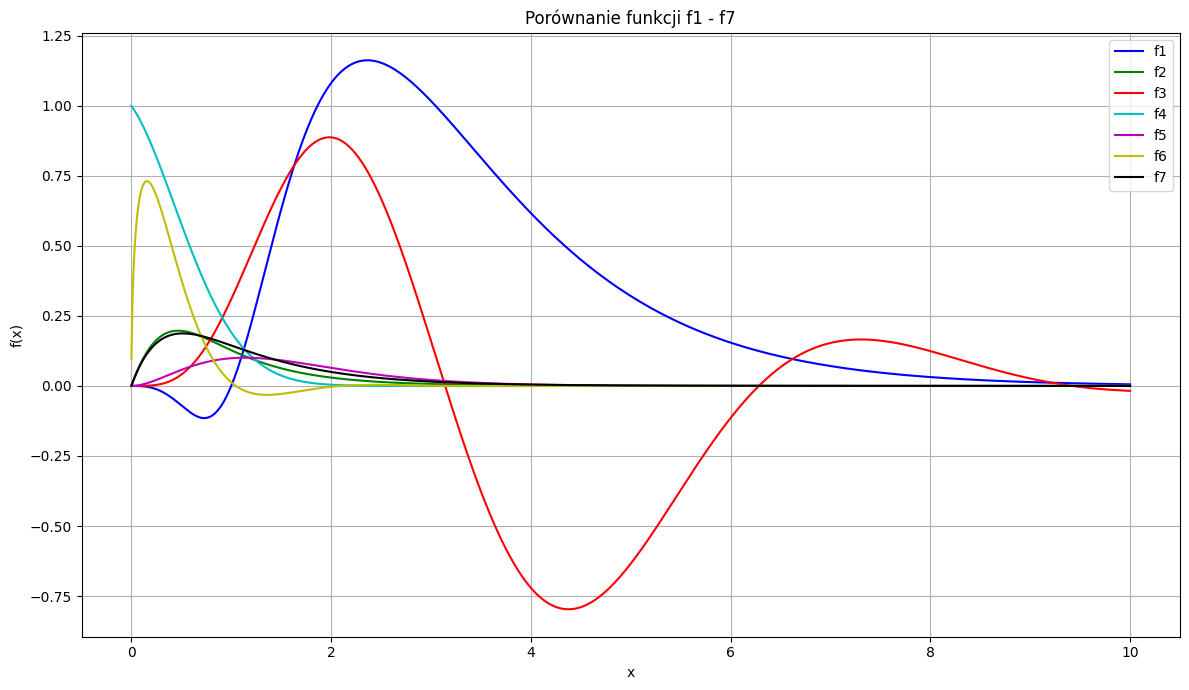

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcje
def f1(x):
    return np.sin(np.pi * (1 + np.sqrt(x)) / (1 + x**2)) * np.exp(-x) *x**3

def f2(x):
    return np.log(x + 1) / (1 + x**2) * np.exp(-x)

def f3(x):
    return np.sqrt(x) * np.sin(x)* np.exp(-x)* x**2.35

def f4(x):
    return np.exp(-x**2) * (x + 1)**0.5* np.exp(-x)

def f5(x):
    return x**2 / (1 + np.exp(x))* np.exp(-x)

def f6(x):
    return np.sin(3 * x) / (x + 1)**2 * np.exp(-x)* x**-0.5

def f7(x):
    return np.arctan(x) / (1 + x)* np.exp(-x)

# Zakres x
x_vals = np.linspace(0.001, 10, 1000)

# Wartości funkcji
functions = [f1, f2, f3, f4, f5, f6, f7]
labels = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Wykresy
plt.figure(figsize=(12, 7))
for f, label, color in zip(functions, labels, colors):
    y_vals = f(x_vals)
    plt.plot(x_vals, y_vals, label=label, color=color)

plt.title("Porównanie funkcji f1 - f7")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
